### **TP Final Análisis de Datos:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

##3 - Análisis Exploratorio:
3.1 - Visualizar las primeras filas.

3.2 - Realizar un resumen de 5 números.

3.3 - Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

3.4 - Identificar las variables de entrada y de salida del problema.

3.4.1 Variables de entrada. Realizar los siguientes análisis por tipo de variable:

3.4.1.1 - Numéricas: Obtener conclusiones acerca de la distribución de los datos.

3.4.1.2 - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.

3.4.1.3 - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?

3.4.2 - Variables de salida (en caso de aplicar):

¿Están balanceadas las clases? o (en caso de aplicar)
¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Los atributos categóricos son:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`ID` | Número de registro. | adimensional
`diagnosis` | Clasificación en maligno o benigno. | adimensional           

Los atributos continuos para un determinado tumor son calculados a partir de varias mediciones de una misma variable a partir de su correspondiente imagenes.
Por ende, los siguientes atributos tendrán valor medio, desviación estándar y el peor valor (el que más tiende a un diagnóstico de maligno para ese tumor en particular).

Atributo | Descripción | Unidad
:---: | :---: | :---:
`radio` | Distancia media desde el centro a los puntos en el perímetro. | μm
`texture` | Desviación standard media de la escala de grises de la imagen. | adimensional
`perimeter` | Perímetro medio del tumor. | μm
`area` | Área media del tumor. | μm^2          
`smoothness` | Variación local media de la longitud del radio. | adimensional     
`compactness` | Valor medio de la compactación: perimeter^2 / area - 1.0. | adimensional
`concavity` | Valor medio de la concavidad. | adimensional            
`concave_points` | Valor medio de número de porciones cóncavas del contorno. | adimensional        
`symmetry` | Valor de simetría media. | adimensional            
`fractal_dimension` | Valor medio de "coastline approximation" - 1. | adimensional


In [ ]:
"""
Este script permite realizar un análisis exploratorio
de los datos para que luego serán utilizados
por modelos de clasificación.
"""

In [ ]:
!pip install seaborn

In [ ]:
# Se importan las librerias nencesarias
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montar Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Se define la ruta al archivo de datos
#ruta_alt = os.path.dirname((os.path.abspath(__file__)))
ruta = '/content/drive/MyDrive/Colab Notebooks/Posgrado/AMq1/Data/data_procesados.xlsx'

In [ ]:
# Se carga el DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(ruta, sheet_name='data')

###3.1 - Visualización de los primeros 5 registros.

In [ ]:
# Se llama al metodo 'head' de pandas
df.head()

,ID,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radio_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_points_std,symmetry_std,fractal_dimension_std
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


###3.2 Resúmen de cinco números.

In [ ]:
# Se solicita estadísticos para cada atributo
df.iloc[:, 2:].describe()

,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radio_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_points_std,symmetry_std,fractal_dimension_std
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


###3.3 - Identificar los tipos de datos:

Indicar si es categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

En el punto 2.3 se vio que originalmente se contó con 32 campos, de los cuales 'ID' es entero (int64), 'diagnosis' es categórico (object) y el resto reales (float64). Vale mencionar que de estos últimos, se elminó 10 debido a reducción de dimensionalidad. Quedando entre las reales (tanto mean como std) de laa siguiente manera:


*   radio
*   texture
*   perimeter
*   area
*   smoothness
*   compactness
*   concavity
*   concave points
*   symmetry
*   fractal dimension











In [ ]:
# Se muestran los tipos de datos de los atributos
print(f"Cantidad de filas: {df.shape[0]}\n")
print(f"Columnas:\n{df.dtypes}")

Cantidad de filas: 569

Columnas:
ID                          int64
diagnosis                  object
radio_mean                float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radio_std                 float64
texture_std               float64
perimeter_std             float64
area_std                  float64
smoothness_std            float64
compactness_std           float64
concavity_std             float64
concave_points_std        float64
symmetry_std              float64
fractal_dimension_std     float64
dtype: object


In [ ]:
dtypes = df.dtypes
cate_columns = dtypes[dtypes == 'object'].count()
inte_columns = dtypes[dtypes == 'int64'].count()
real_columns = dtypes[dtypes == 'float64'].count()
print(f"Cant. campos entero: {inte_columns} \nCant. campos categórico: {cate_columns} \nCant. campos real: {real_columns}")

Cant. campos entero: 1 
Cant. campos categórico: 1 
Cant. campos real: 20


###3.4 - Identificar las variables de entrada y de salida del problema.

Las variables de entrada del problema son las reales (tanto mean como std). Es decir:

*   radio
*   texture
*   perimeter
*   area
*   smoothness
*   compactness
*   concavity
*   concave points
*   symmetry
*   fractal dimension

Mientras que las variable de salida es el target:
*   diagnosis


Observaciones: Se detectan 3 diagonales con valores cercanos (o iguales) a uno en el mapa anterior.

La principal, que se extiende de la esquina superior izquierda a la esquina inferior derecha asociada a que se realiza la correlación entre una característica y si misma.

Luego, se detectan dos diagonales abajo a la izquierda y arriba a la derecha del mapa. Esto está asociado la elevada correlación que hay entre el valor medio de una característica y el valor máximo de la misma.

El equipo decidió eliminar los datos relacionados con los *worst values* (valores peores o valores máximos) de los atributos, para así mejorar lel remdimiento del modelo (Guyon y Elisseeff, 2003). La lista de características eliminadas son:

*   radio_worst
*   texture_worst
*   perimeter_worst
*   area_worst
*   smoothness_worst
*   compactness_worst
*   concavity_worst
*   concave_point_worst
*   symmetry_worst
*   fratal_dimension_worst











###3.4.1.1 Numéricas: Obtener conclusiones acerca de la distribución de los datos.

In [ ]:
# Graficado de características
def distribuciones_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Obtén la lista de nombres de columnas numéricas
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Itera sobre las columnas numéricas y grafica la distribución de cada una
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, edgecolor='black', kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.grid(True)
    plt.show()


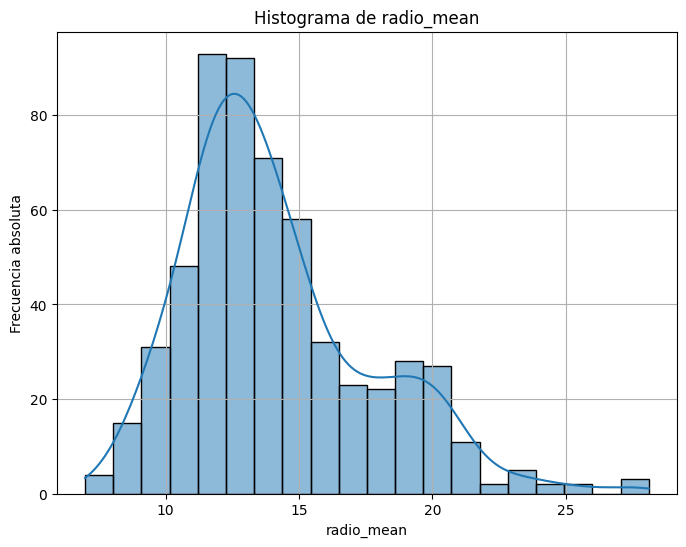

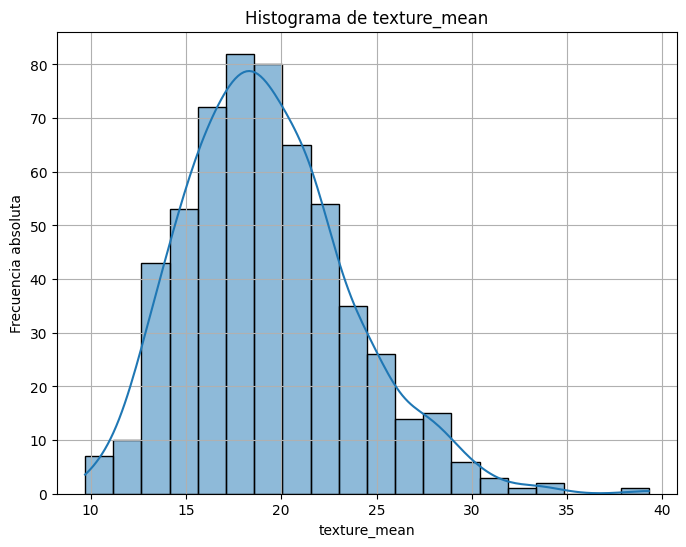

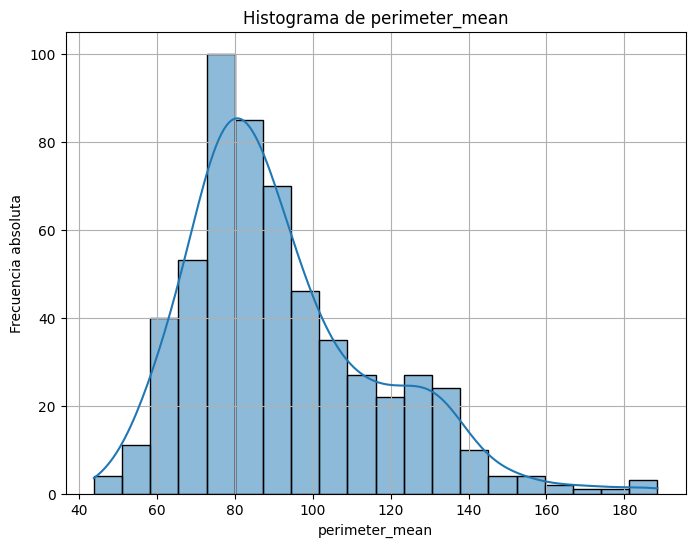

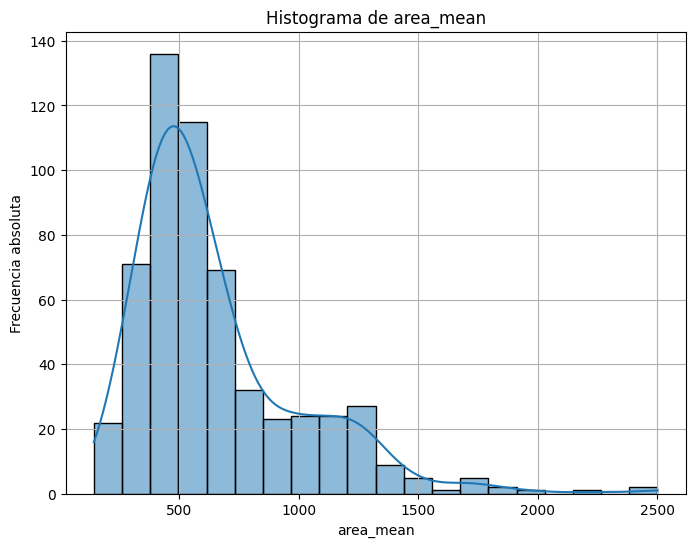

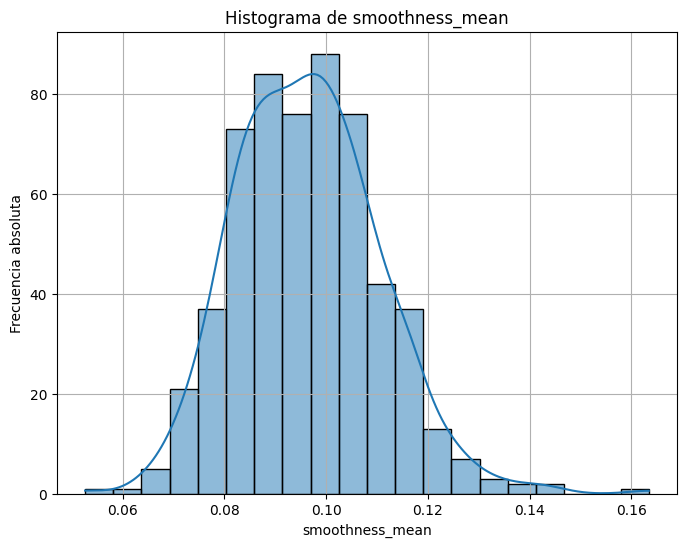

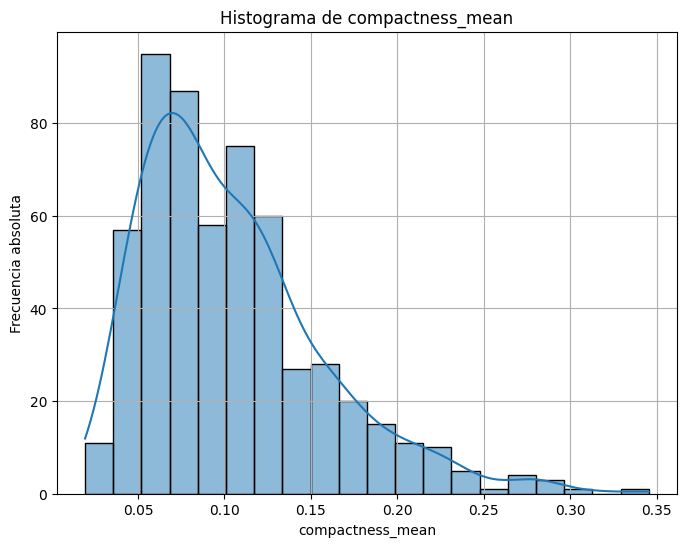

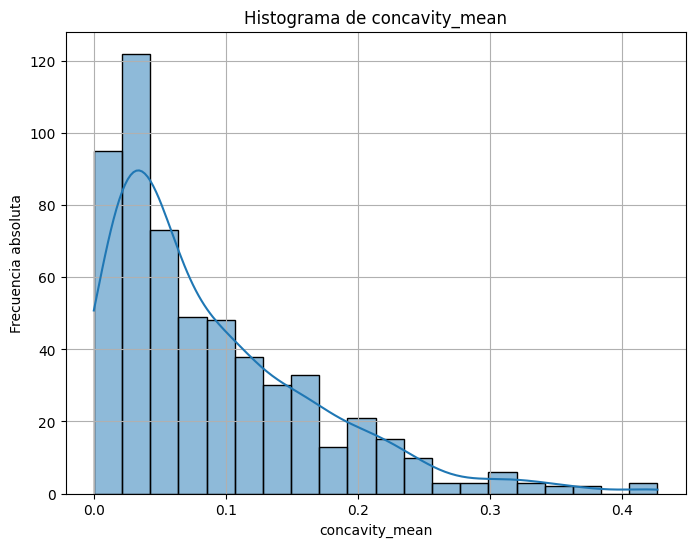

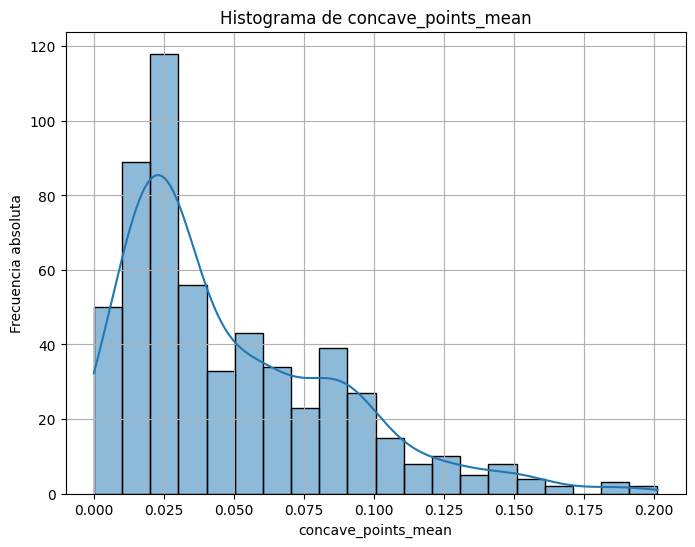

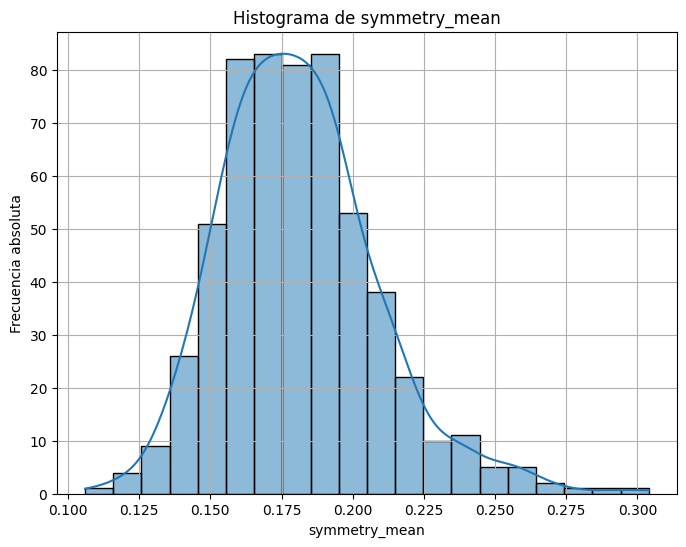

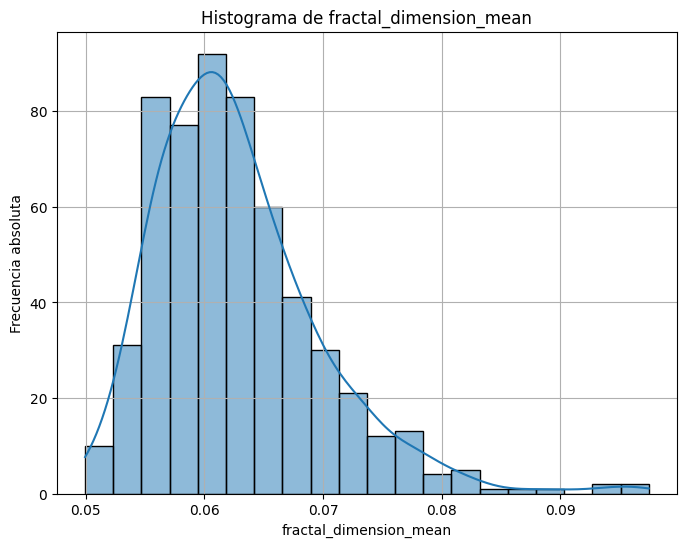

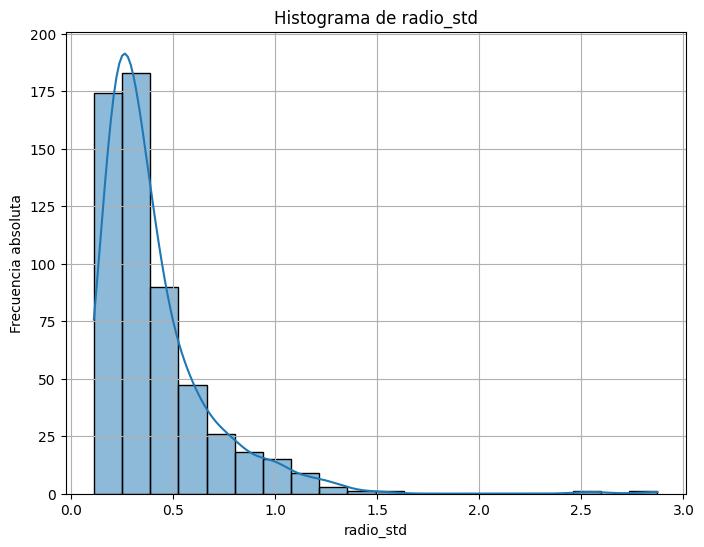

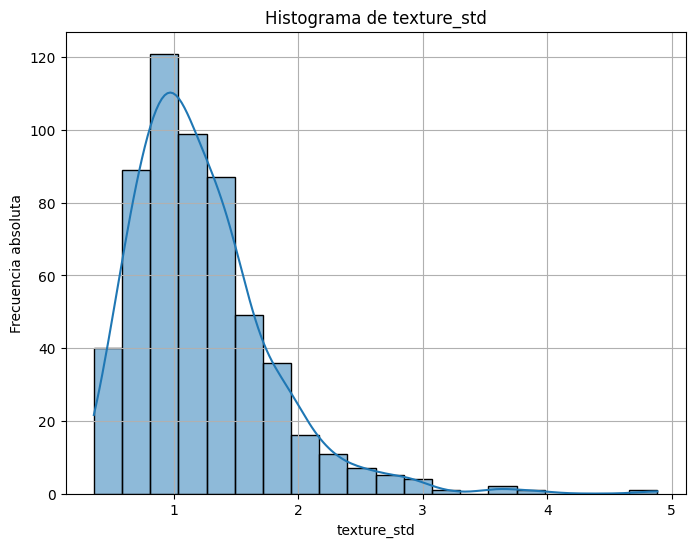

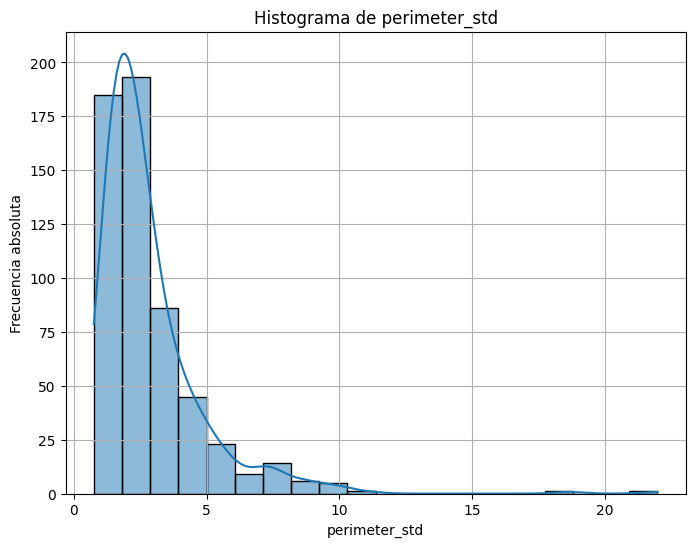

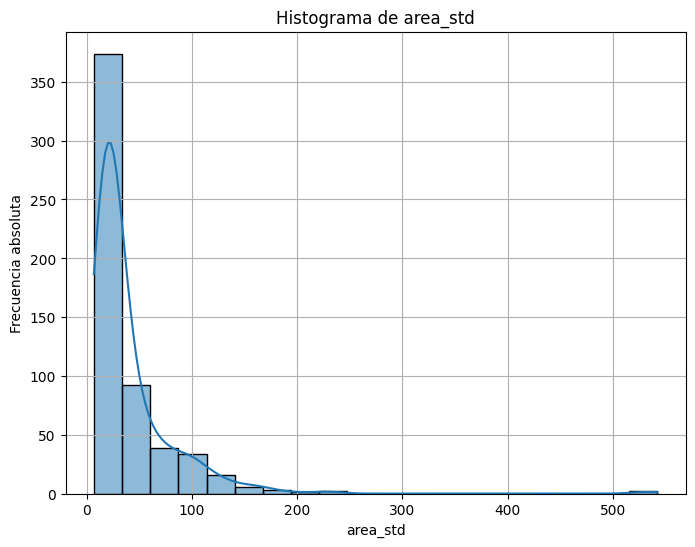

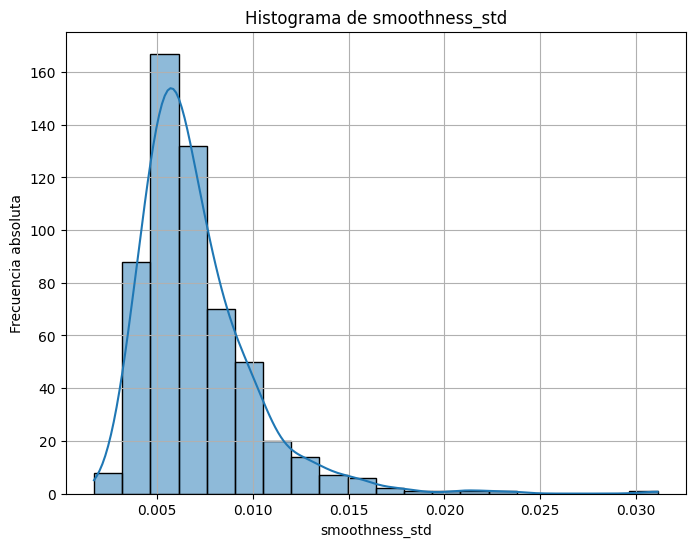

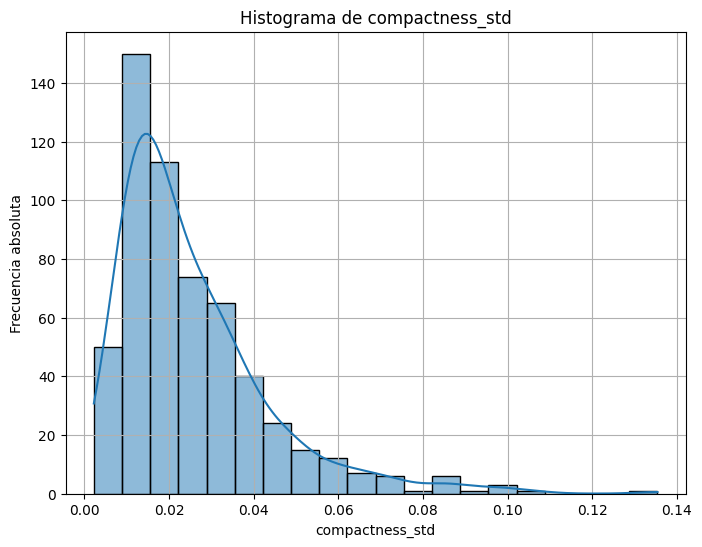

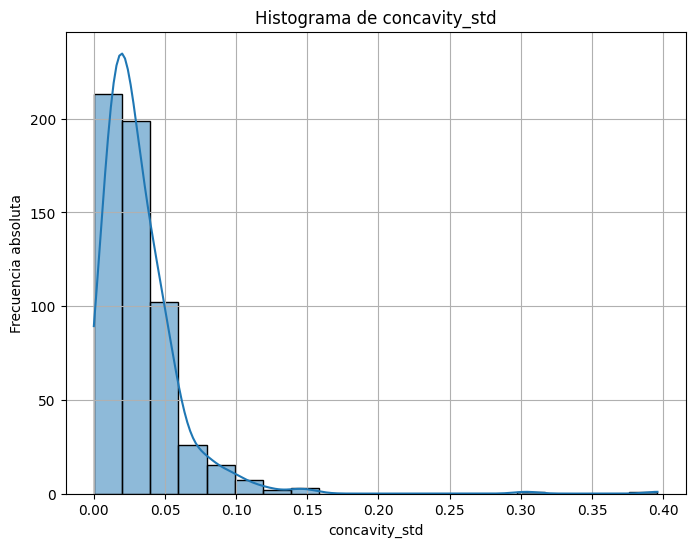

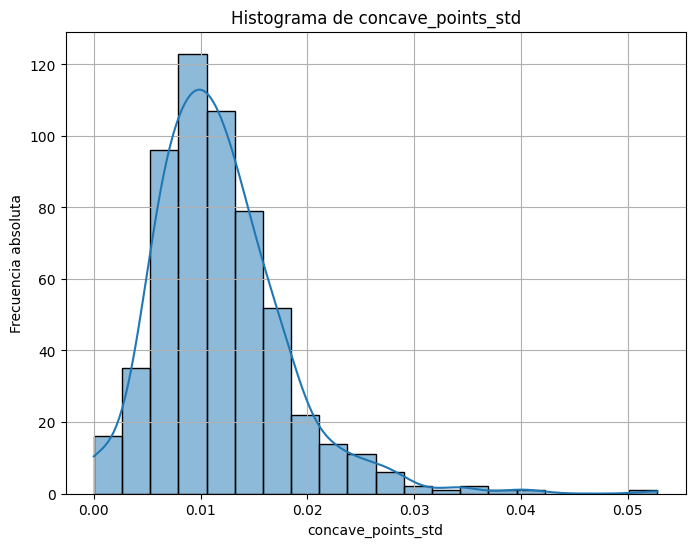

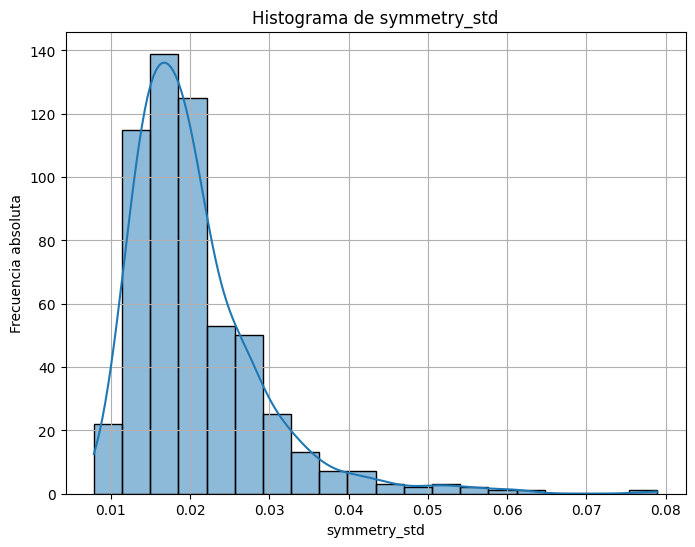

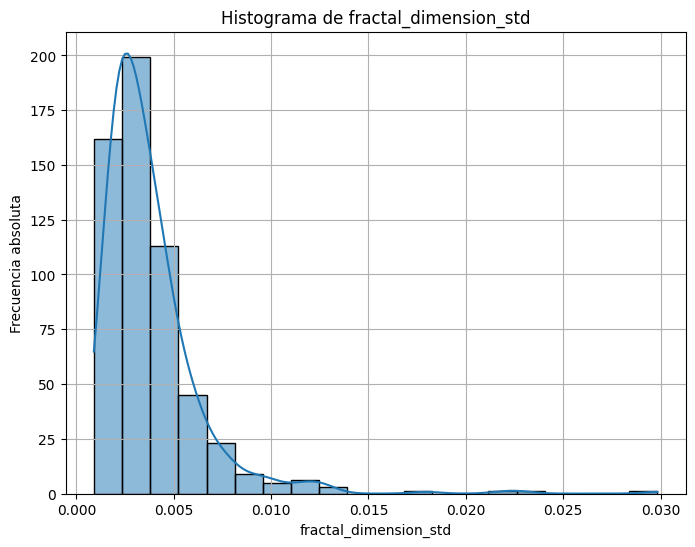

In [ ]:
distribuciones_reales(df)

In [ ]:
# Graficado de características discriminado por M o B
def distribuciones_discriminadas_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada
  discriminando cuando el diagnóstico es "maligno"
  y por otro lado cuando es "benigno".

  :param:
  :df: DataFrame con los atributos.
  """
  # Filtrar registros cuando 'categoria' es 'M'
  df_m = df[df['diagnosis'] == 'M']

  # Filtrar registros cuando 'categoria' es 'B'
  df_b = df[df['diagnosis'] == 'B']

  # Obtener lista de nombres de campos numéricos
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Plotear histogramas para cada campo numérico
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    # Histograma para 'M'
    sns.histplot(df_m[feature], bins=20, color='red', label='M', alpha=0.5, kde=True)
    # Histograma para 'B'
    sns.histplot(df_b[feature], bins=20, color='green', label='B', alpha=0.5, kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.legend()
    plt.grid(True)
    plt.show()


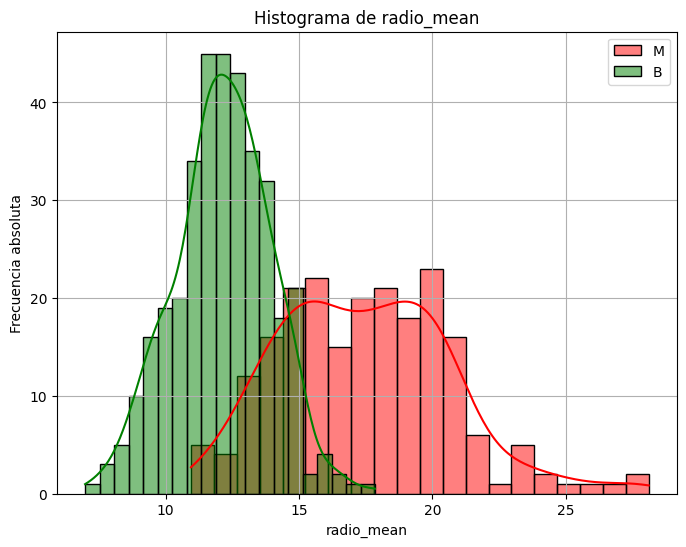

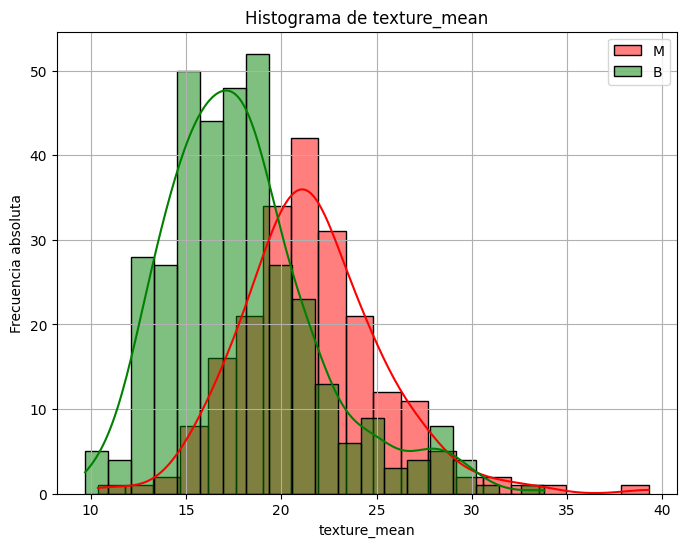

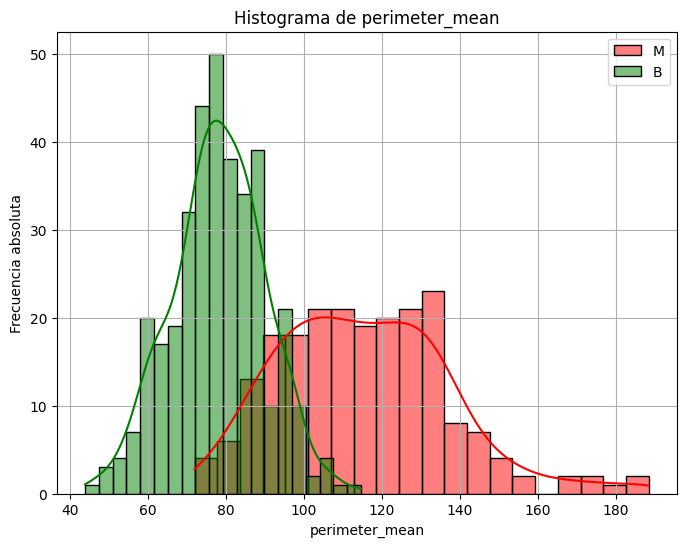

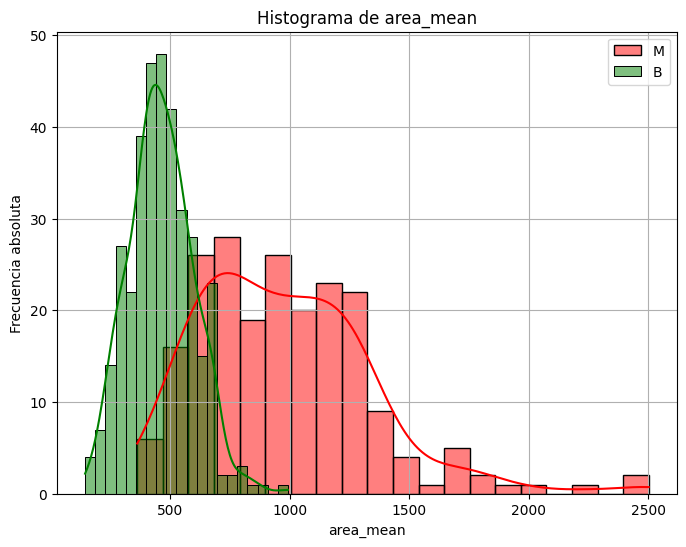

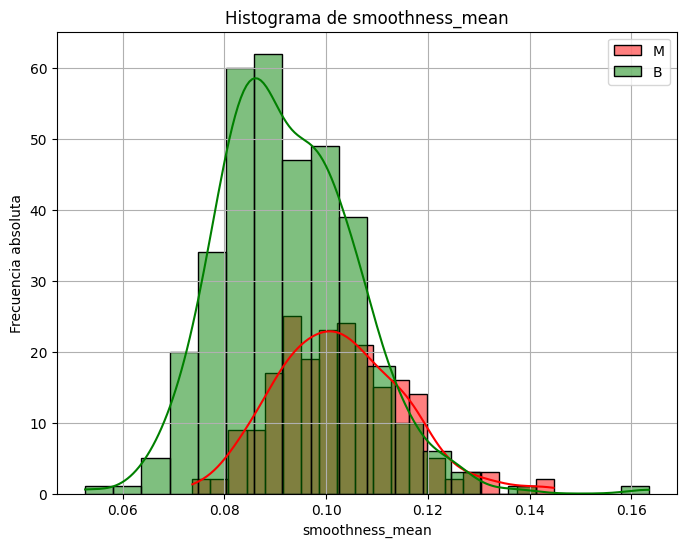

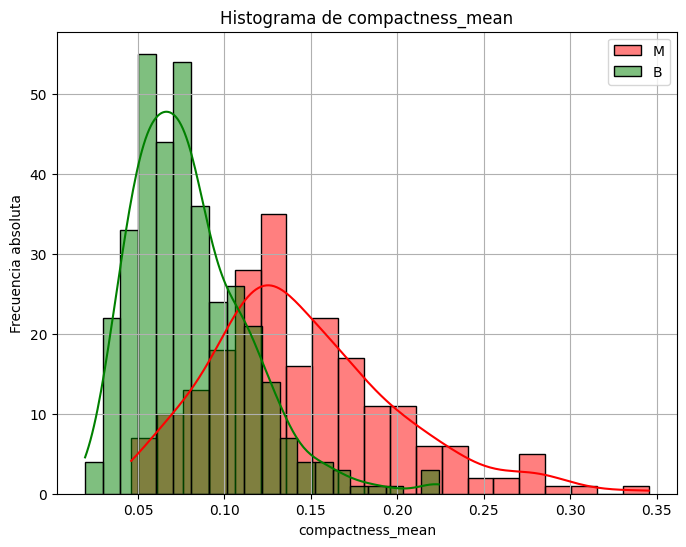

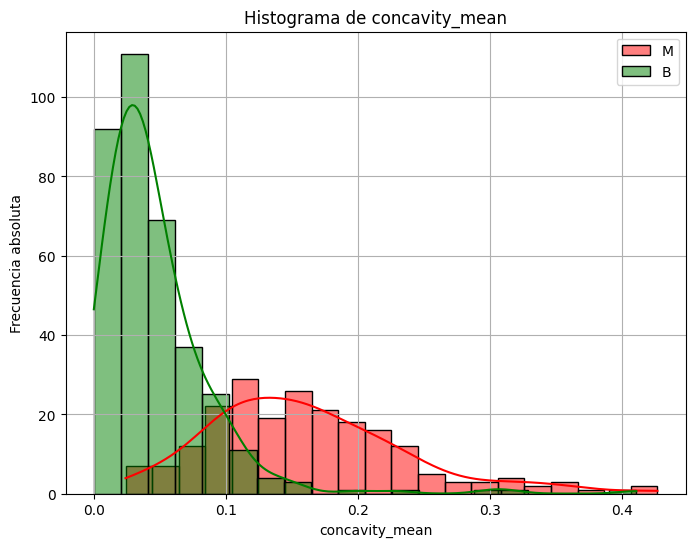

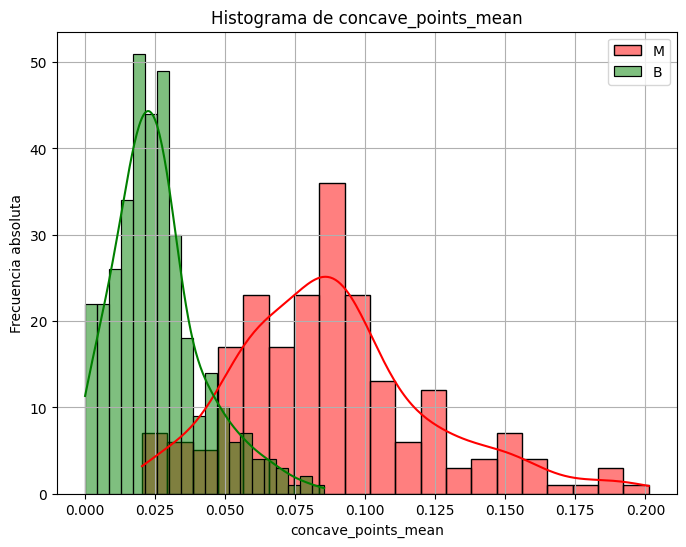

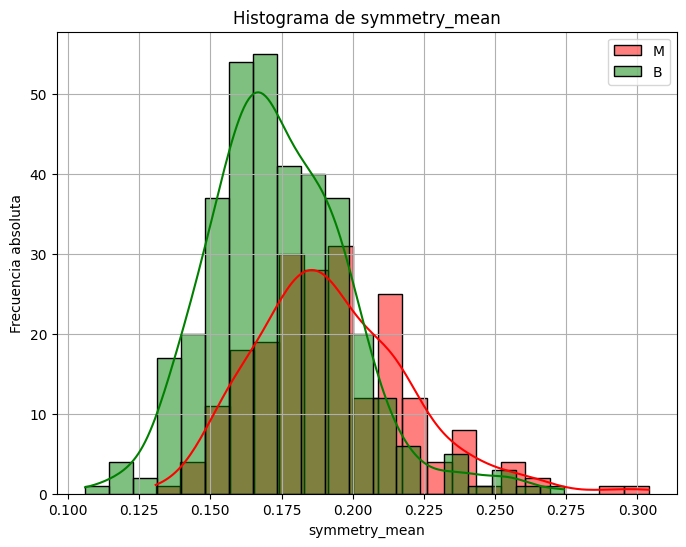

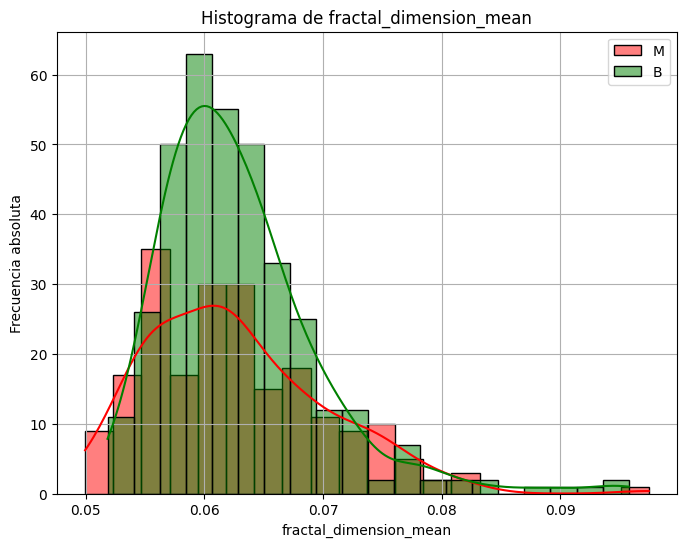

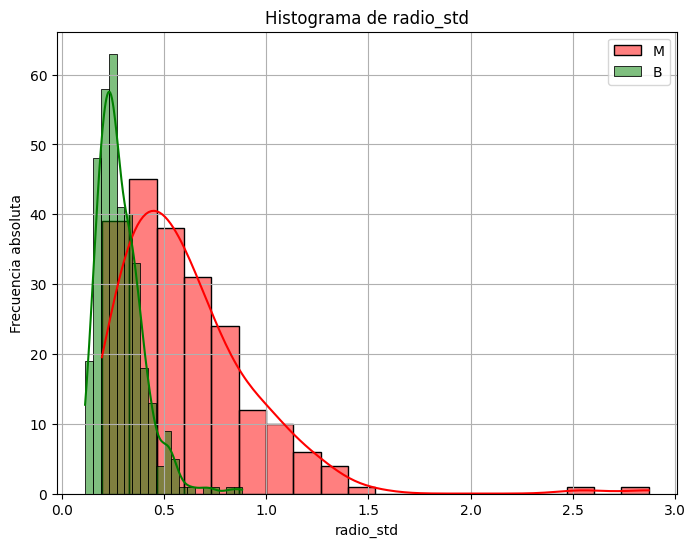

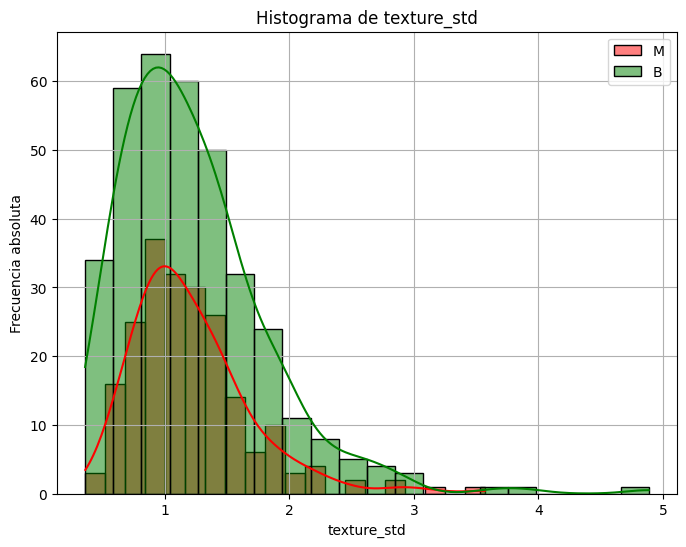

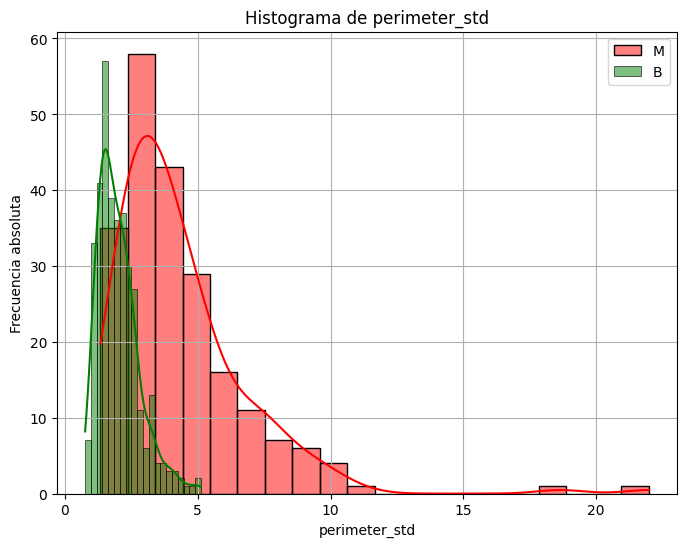

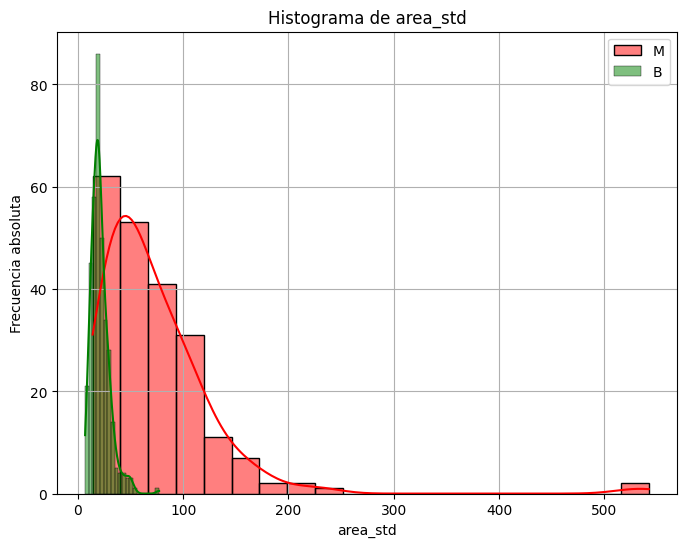

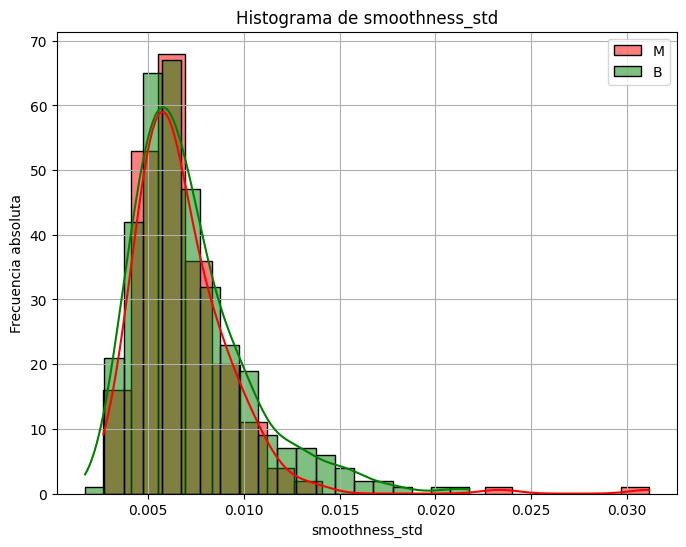

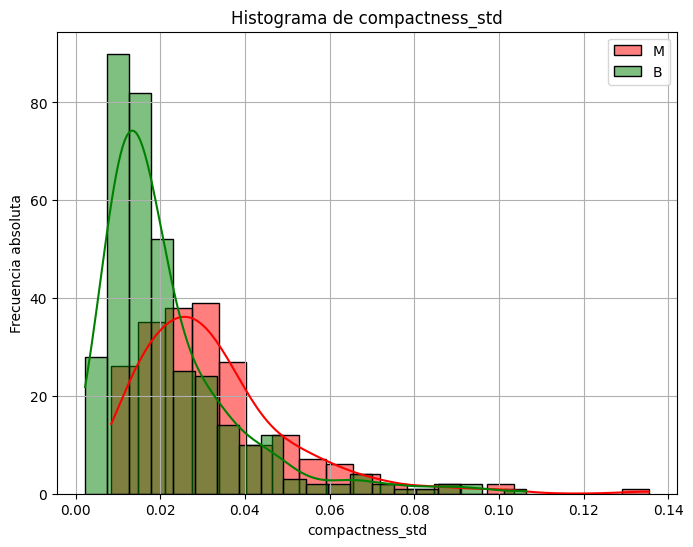

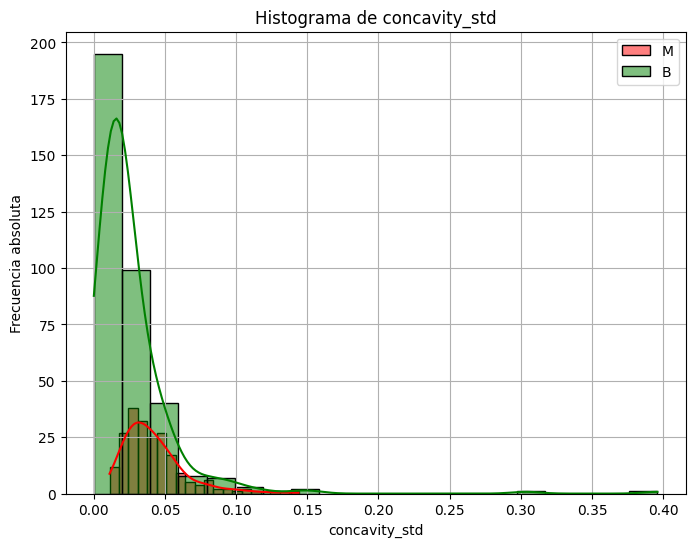

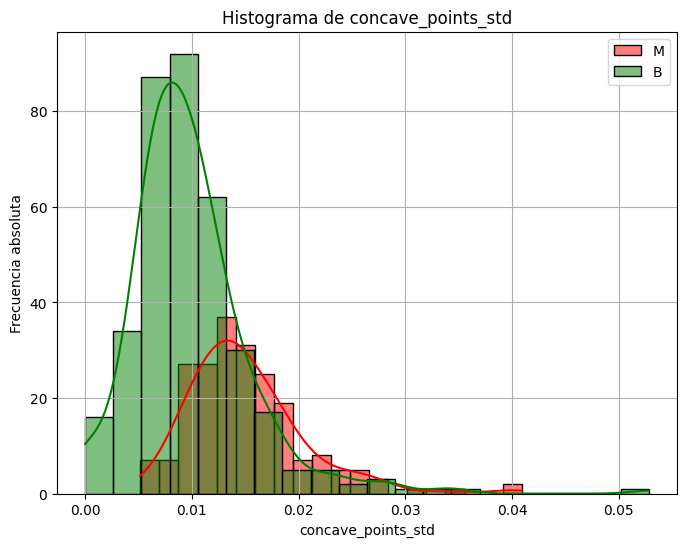

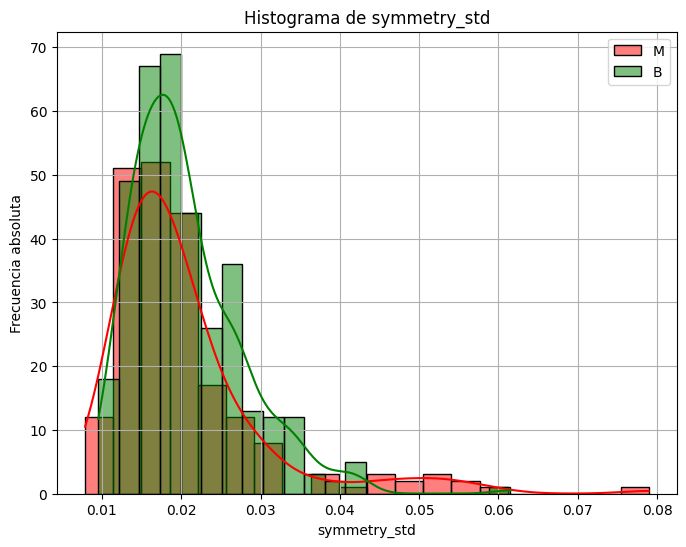

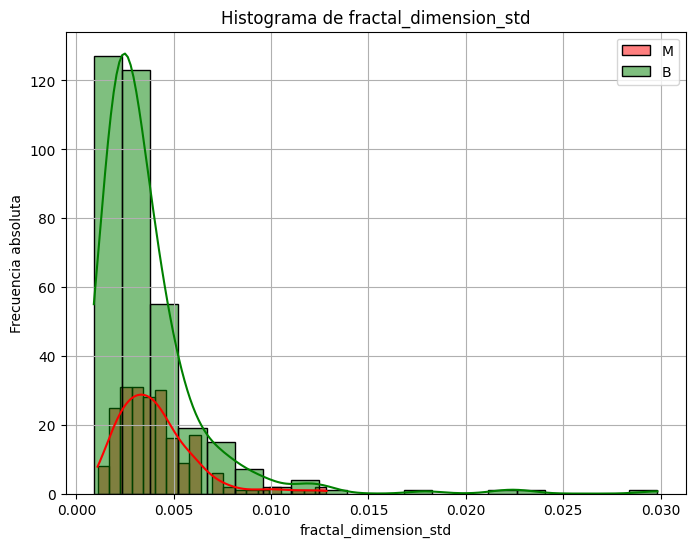

In [ ]:
distribuciones_discriminadas_reales(df)

Observaciones:

1 - Distribución de atributos medios: Se observó que en el caso benigno la media y desvío estándar son menores que en el caso maligno. En el caso de la media el resultado es esperable dado que tumores con valores medios de radio, textura, área, perímero, entre otros, menores tiende a ser un diagnóstico de tumor benigno. No tan evidente es el resultado de desvío estándar mayor en el caso de tumores malignos. Además, en casos como 'concave_points_mean' ambas distribuciones (maligno/beningo) se encuentran separadas permitiendo definir más fácilmente umbrales empíricos de diagnóstico, en otros casos como 'symmetry_mean' se superponen un poco más haciendo más difícil la definición de umbrales.

2 - Distribución de la std de atributos: Considerando atributos como el radio, el perímetro y el área el valor medio de std suele ser mayor en el caso de tumor maligno. Esto no es generalizable dado que en otros atributos como la suavidad de la superficie las distribuciones de std de tumor maligno y benigno son similares tanto en valor medio como en dispersión.

###3.4.1.2 - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.

In [ ]:
# Graficado de característica categorica
def distribuciones_categoricas(df):
  """
  Genera la distribución de la característica
  categórica almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Filtrar registros cuando 'diagnosis' es 'B' o 'M'
  counts = df['diagnosis'].value_counts()

  # Plotear el histograma
  plt.figure(figsize=(8, 6))
  plt.bar(counts.index, counts.values, width=0.2, align='center')
  plt.title('Distribución de diagnósticos')
  plt.xlabel('Diagóstico')
  plt.ylabel('Frecuencia absoluta')
  plt.legend()
  plt.grid(True)
  plt.show()


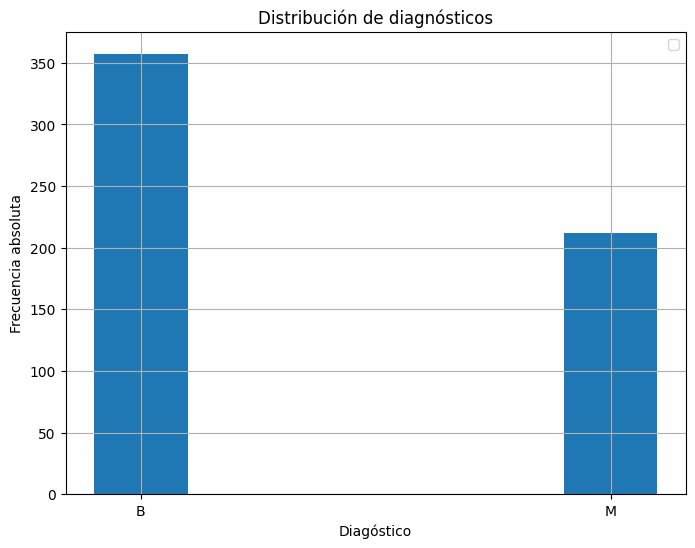

In [ ]:
distribuciones_categoricas(df)